In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error

> # **Aula 022** - Série temporal - **Tensorflow: Redes Neurais Recorrentes**
>> Exemplo: Preços da bolsa de valores

In [174]:
base = pd.read_csv('petr4.csv')
base.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0


In [175]:
base.shape

(1262, 7)

In [176]:
base = base.dropna()
base.shape

(1259, 7)

In [177]:
base = base.iloc[:, 1].values
base

array([19.99    , 19.809999, 20.33    , ..., 18.26    , 18.4     ,
       18.42    ])

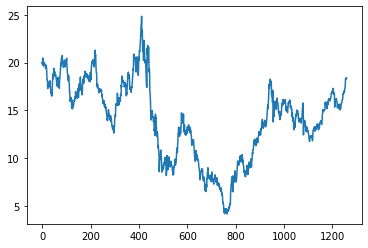

In [178]:
plt.plot(base)

In [179]:
periodos = 30
previsao_futura = 1

X = base[0:(len(base)- len(base) % periodos)]
X

array([19.99    , 19.809999, 20.33    , ..., 15.48    , 15.36    ,
       15.65    ])

In [180]:
X_batches = X.reshape(-1, periodos, 1)
X_batches

array([[[19.99    ],
        [19.809999],
        [20.33    ],
        ...,
        [17.950001],
        [17.790001],
        [17.610001]],

       [[17.639999],
        [17.91    ],
        [18.1     ],
        ...,
        [18.6     ],
        [18.27    ],
        [18.27    ]],

       [[17.68    ],
        [17.950001],
        [17.58    ],
        ...,
        [19.530001],
        [19.5     ],
        [19.52    ]],

       ...,

       [[13.6     ],
        [13.14    ],
        [12.98    ],
        ...,
        [15.02    ],
        [15.1     ],
        [15.25    ]],

       [[15.85    ],
        [15.6     ],
        [15.79    ],
        ...,
        [16.969999],
        [16.9     ],
        [16.99    ]],

       [[16.9     ],
        [16.959999],
        [17.049999],
        ...,
        [15.48    ],
        [15.36    ],
        [15.65    ]]])

In [181]:
y = base[1:((len(base) - len(base) % periodos) + previsao_futura)]
y

array([19.809999, 20.33    , 20.48    , ..., 15.36    , 15.65    ,
       15.1     ])

In [182]:
y_batches = y.reshape(-1, periodos, 1)
y_batches

array([[[19.809999],
        [20.33    ],
        [20.48    ],
        ...,
        [17.790001],
        [17.610001],
        [17.639999]],

       [[17.91    ],
        [18.1     ],
        [17.469999],
        ...,
        [18.27    ],
        [18.27    ],
        [17.68    ]],

       [[17.950001],
        [17.58    ],
        [17.860001],
        ...,
        [19.5     ],
        [19.52    ],
        [19.91    ]],

       ...,

       [[13.14    ],
        [12.98    ],
        [13.08    ],
        ...,
        [15.1     ],
        [15.25    ],
        [15.85    ]],

       [[15.6     ],
        [15.79    ],
        [15.86    ],
        ...,
        [16.9     ],
        [16.99    ],
        [16.9     ]],

       [[16.959999],
        [17.049999],
        [17.309999],
        ...,
        [15.36    ],
        [15.65    ],
        [15.1     ]]])

In [183]:
X_teste = base[-(periodos + previsao_futura):]
X_teste = X_teste[:periodos]
X_teste

array([15.36    , 15.65    , 15.1     , 15.05    , 15.16    , 15.18    ,
       15.21    , 15.31    , 15.75    , 15.75    , 15.75    , 15.99    ,
       16.1     , 16.1     , 16.190001, 16.49    , 16.780001, 16.700001,
       16.74    , 17.030001, 16.92    , 16.879999, 17.040001, 17.32    ,
       17.35    , 17.92    , 18.35    , 18.309999, 18.26    , 18.4     ])

In [184]:
X_teste = X_teste.reshape(-1, periodos, 1)
print(X_teste.shape)
X_teste

(1, 30, 1)


array([[[15.36    ],
        [15.65    ],
        [15.1     ],
        [15.05    ],
        [15.16    ],
        [15.18    ],
        [15.21    ],
        [15.31    ],
        [15.75    ],
        [15.75    ],
        [15.75    ],
        [15.99    ],
        [16.1     ],
        [16.1     ],
        [16.190001],
        [16.49    ],
        [16.780001],
        [16.700001],
        [16.74    ],
        [17.030001],
        [16.92    ],
        [16.879999],
        [17.040001],
        [17.32    ],
        [17.35    ],
        [17.92    ],
        [18.35    ],
        [18.309999],
        [18.26    ],
        [18.4     ]]])

In [185]:
y_teste = base[-(periodos):]
y_teste

array([15.65    , 15.1     , 15.05    , 15.16    , 15.18    , 15.21    ,
       15.31    , 15.75    , 15.75    , 15.75    , 15.99    , 16.1     ,
       16.1     , 16.190001, 16.49    , 16.780001, 16.700001, 16.74    ,
       17.030001, 16.92    , 16.879999, 17.040001, 17.32    , 17.35    ,
       17.92    , 18.35    , 18.309999, 18.26    , 18.4     , 18.42    ])

In [186]:
y_teste = y_teste.reshape(-1, periodos, 1)
print(y_teste.shape)
y_teste

(1, 30, 1)


array([[[15.65    ],
        [15.1     ],
        [15.05    ],
        [15.16    ],
        [15.18    ],
        [15.21    ],
        [15.31    ],
        [15.75    ],
        [15.75    ],
        [15.75    ],
        [15.99    ],
        [16.1     ],
        [16.1     ],
        [16.190001],
        [16.49    ],
        [16.780001],
        [16.700001],
        [16.74    ],
        [17.030001],
        [16.92    ],
        [16.879999],
        [17.040001],
        [17.32    ],
        [17.35    ],
        [17.92    ],
        [18.35    ],
        [18.309999],
        [18.26    ],
        [18.4     ],
        [18.42    ]]])

In [187]:
tf.reset_default_graph()

entradas = 1
neuronios_camada_oculta = 100
neuronios_saida = 1

xph = tf.placeholder(tf.float32, [None, periodos, entradas])
yph = tf.placeholder(tf.float32, [None, periodos, neuronios_saida])

def create_cell():
  return tf.contrib.rnn.LSTMCell(num_units= neuronios_camada_oculta, activation= tf.nn.relu)

def create_multiple_cells(num_cells):
  celulas = tf.nn.rnn_cell.MultiRNNCell([create_cell() for i in range(num_cells)])
  #return tf.contrib.rnn.DropoutWrapper(celulas, output_keep_prob= 0.1)
  return celulas

#celula = tf.contrib.rnn.BasicRNNCell(num_units= neuronios_camada_oculta, activation= tf.nn.relu)
#celula = tf.contrib.rnn.LSTMCell(num_units= neuronios_camada_oculta, activation= tf.nn.relu)

celula = create_multiple_cells(4)
# mapeamento para camada de saida
celula = tf.contrib.rnn.OutputProjectionWrapper(celula, output_size= 1)

saida_rnn, _ = tf.nn.dynamic_rnn(celula, xph, dtype=tf.float32)
erro = tf.losses.mean_squared_error(labels= yph, predictions= saida_rnn)

otimizador = tf.train.AdamOptimizer(learning_rate= 0.001)
treinamento = otimizador.minimize(erro)

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  for epoch in range(1000):
    _, custo = sess.run([treinamento, erro], feed_dict={xph:X_batches, yph:y_batches})
    if(epoch % 100 == 0):
      print(f'epoch {epoch} - erro {custo}')
  
  previsoes = sess.run(saida_rnn, feed_dict={xph: X_teste})

epoch 0 - erro 221.32774353027344
epoch 100 - erro 12.117117881774902
epoch 200 - erro 1.6334248781204224
epoch 300 - erro 0.765105664730072
epoch 400 - erro 0.3546765446662903
epoch 500 - erro 0.23331931233406067
epoch 600 - erro 0.21488022804260254
epoch 700 - erro 0.16010060906410217
epoch 800 - erro 0.15508656203746796
epoch 900 - erro 0.12979952991008759


In [188]:
y_teste2 = np.ravel(y_teste)
previsoes2 = np.ravel(previsoes)

mae = mean_absolute_error(y_teste2, previsoes2)
mae

0.2588044790547694

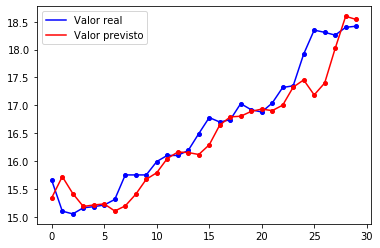

In [189]:
plt.plot(y_teste2, color='b', label= 'Valor real')
plt.plot(y_teste2, 'o', color='b', markersize=4)
plt.plot(previsoes2, color='r', label= 'Valor previsto')
plt.plot(previsoes2, 'o', color='r', markersize=4)
plt.legend()